In [4]:
!pip install pandas openpyxl

In [267]:
!pip install statsmodels

In [77]:
# 라이브러리 임포트
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import mannwhitneyu

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.graphics.mosaicplot import mosaic
mpl.rc('font',family='Malgun Gothic')  # 한글폰트 설정 "맑은 고딕"
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3


# 엑셀 파일 경로
file_path = r"C:\Users\MINSEOK\Downloads\국민건강영양조사_(2010-2023)\hn23_all.xlsx"
df_22=pd.read_excel(r"C:\Users\MINSEOK\Downloads\국민건강영양조사_(2010-2023)\hn22_all.xlsx")
df = pd.read_excel(file_path, engine='openpyxl')

In [78]:
df

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_FOLATE,N_VITC,LF_SECUR_Y,LF_BUYER,LF_SAFE
0,2024.12.10.,YA84208301,YA842083,2023,1,1,2,YA84,1,75,...,2704.555129,22.304061,0.689636,0.911565,4.519287,108.528994,29.390490,1.0,1.0,1.0
1,2024.12.10.,YA84208302,YA842083,2023,1,1,2,YA84,2,70,...,1190.505880,44.455061,1.010501,0.839130,6.333379,52.454348,15.650710,1.0,1.0,1.0
2,2024.12.10.,YA84212402,YA842124,2023,1,1,2,YA84,2,42,...,6752.011600,364.273465,1.839332,3.257774,24.363661,231.528144,35.242941,1.0,1.0,2.0
3,2024.12.10.,YA84212404,YA842124,2023,1,1,2,YA84,2,9,...,2213.362823,893.834459,1.873845,2.962366,22.194257,374.230895,69.595766,1.0,1.0,2.0
4,2024.12.10.,YA84242702,YA842427,2023,1,1,2,YA84,1,43,...,2136.906180,309.283062,1.086500,2.021552,10.360013,366.058694,65.171145,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,2024.12.10.,YR62368101,YR623681,2023,8,2,1,YR62,1,80,...,2158.199974,9.514286,0.652938,1.151994,12.808814,337.352062,26.125158,1.0,1.0,1.0
6925,2024.12.10.,YR62368102,YR623681,2023,8,2,1,YR62,2,78,...,2217.551546,42.535857,1.310568,1.151318,14.870108,184.289904,17.537722,1.0,1.0,1.0
6926,2024.12.10.,YR62370201,YR623702,2023,8,2,1,YR62,2,61,...,949.749369,219.443462,0.742543,1.677973,10.877976,417.792346,20.586685,1.0,1.0,1.0
6927,2024.12.10.,YR62394401,YR623944,2023,8,2,1,YR62,1,57,...,4495.650299,193.857866,0.937317,1.827701,7.649848,433.988024,53.146545,1.0,2.0,1.0


In [79]:
selected_cols = ['ID', 'sex', 'age', 'BE3_73','BE3_74', 'BE3_77','BE3_78', 'BE3_83','BE3_84', 'BE3_87','BE3_88', 'pa_aerobic','HE_obe', 'HE_BMI']
df_selected = df[selected_cols]

In [80]:
df_selected.columns = df_selected.columns.str.strip()  # 공백 제거

In [81]:
#1: 남성, 2: 여성
df_selected = df_selected.replace({'sex': 1}, 'M')
df_selected = df_selected.replace({'sex': 2}, 'F')

In [82]:
df_selected = df_selected.rename(columns={
    'BE3_73': 'vigorous_work(h)',
    'BE3_74': 'vigorous_work(m)',
    'BE3_77': 'vigorous_leisure(h)',
    'BE3_78': 'vigorous_leisure(m)',
    'BE3_83': 'moderate_work(h)',
    'BE3_84': 'moderate_work(m)',
    'BE3_87': 'moderate_leisure(h)',
    'BE3_88': 'moderate_leisure(m)',
    'pa_aerobic': 'aerobic',
    'HE_obe': 'obesity',
    'HE_BMI': 'BMI'
})

In [83]:
conditions = [
    (df_selected['obesity'] == 1),
    (df_selected['obesity'].isin([2, 3])),
    (df_selected['obesity'].isin([4, 5, 6]))
]
choices = ['저체중', '정상', '비만']

df_selected['isObesity'] = np.select(conditions, choices, default='NaN')
df_selected = df_selected[df_selected['isObesity'] != '저체중'] #저체중 열 제외
df_selected['BMI'] = round(df_selected['BMI'], 1)

In [84]:
bins = [0, 19, 29, 39, 49, 59, 69 ,80]
age_labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70+']
df_selected['age_group'] = pd.cut(df_selected.age, bins=bins, labels = age_labels)

In [85]:
#결측치(NaN, 무응답) 제거
df_selected = df_selected.dropna()

cols = ['vigorous_work(h)', 'vigorous_work(m)', 'vigorous_leisure(h)', 'vigorous_leisure(m)', 'moderate_work(h)', 'moderate_work(m)', 'moderate_leisure(h)', 'moderate_leisure(m)']
df_selected = df_selected[~df_selected[cols].isin([99]).any(axis=1)]

In [86]:
#비해당은 0시간으로 기록
df_selected[cols] = df_selected[cols].replace(88, 0)

In [87]:
vigorous_work = round(df_selected['vigorous_work(h)'] + df_selected['vigorous_work(m)'] / 60, 1)
vigorous_leisure = round(df_selected['vigorous_leisure(h)'] + df_selected['vigorous_leisure(m)'] / 60, 1)
moderate_work = round(df_selected['moderate_work(h)'] + df_selected['moderate_work(m)'] / 60, 1)
moderate_leisure = round(df_selected['moderate_leisure(h)'] + df_selected['moderate_leisure(m)'] / 60, 1)

df_selected['vigorous'] = vigorous_work + vigorous_leisure
df_selected['moderate'] = moderate_work + moderate_leisure

In [88]:
def Calculator(a):
    Cal_moderate = a['moderate']
    Cal_vigorous = a['vigorous']
    total = Cal_moderate + Cal_vigorous * 2
    if total == 0:
        return 0
    elif total < 1.5:
        return 1
    elif total >= 1.5:
        return 2

In [89]:
def Calculator1(a):
    Cal_moderate = a['moderate']
    Cal_vigorous = a['vigorous']
    total = Cal_moderate + Cal_vigorous * 2
    return total

In [90]:
df_selected['workout_rate'] = df_selected.apply(Calculator, axis=1)
df_selected['workout'] = df_selected.apply(Calculator1, axis=1)

In [91]:
df_selected

,ID,sex,age,vigorous_work(h),vigorous_work(m),vigorous_leisure(h),vigorous_leisure(m),moderate_work(h),moderate_work(m),moderate_leisure(h),moderate_leisure(m),aerobic,obesity,BMI,isObesity,age_group,vigorous,moderate,workout_rate,workout
0,YA84208301,M,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.1,정상,70+,0.0,0.0,0,0.0
2,YA84212402,F,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,21.8,정상,40s,0.0,0.0,0,0.0
4,YA84242702,M,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.3,정상,40s,0.0,0.0,0,0.0
8,YA84382301,M,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,22.8,정상,40s,0.0,0.0,0,0.0
9,YA84382302,F,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,20.2,정상,40s,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,YR62368101,M,80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,24.0,정상,70+,0.0,0.0,0,0.0
6925,YR62368102,F,78,0.0,0.0,0.0,0.0,0.0,30.0,1.0,0.0,1.0,4.0,29.0,비만,70+,0.0,1.5,2,1.5
6926,YR62370201,F,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,2.0,19.1,정상,60s,0.0,0.3,1,0.3
6927,YR62394401,M,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,3.0,24.9,정상,50s,0.0,0.3,1,0.3


---

#### 운동 실천율 - 비만율 관계 주목 이유: 체중조절 방법으로 운동을 선택한 사람의 비율이 많음
#### 따라서 운동 실천율에 따라 비만여부에 차이가 있을 것이다라고 가정

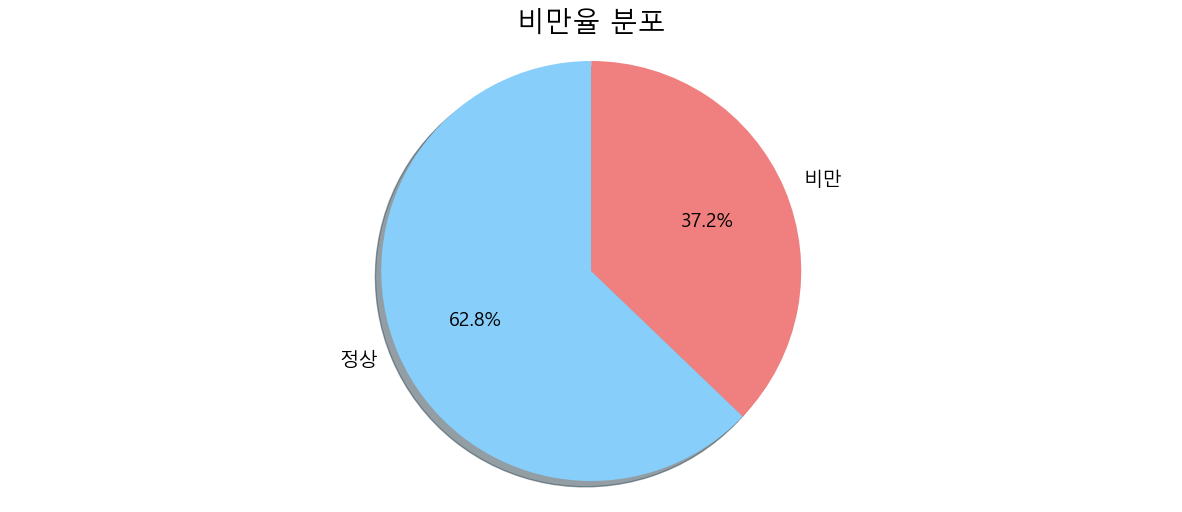

In [24]:
# 1)
labels = ['정상', '비만']
sizes = [(df_selected.isObesity == '정상').sum(), (df_selected.isObesity == '비만').sum()]
colors = ['lightskyblue', 'lightcoral']

plt.figure(figsize = (15, 6))

plt.pie(sizes, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90, counterclock = True, textprops={'fontsize': 14})

plt.axis('equal')
plt.title('비만율 분포', fontsize = 20)
plt.show()

In [25]:
selected_col = ['BO2_1', 'BO3_01']
df1 = df_22[selected_col]
df1 = df1.rename(columns={
    'BO2_1': 'try',
    'BO3_01': 'exercise'})

df1 = df1.dropna() # 결측치 제거
df1 = df1[~(df1['try'].isin([4, 8, 9]))]
#df1.try --> 1:체중 감소 노력 2:체중 유지 노력 3: 체중 증가 노력 4: 체중 조절 해본적 없음 8:비해당 9:무응답

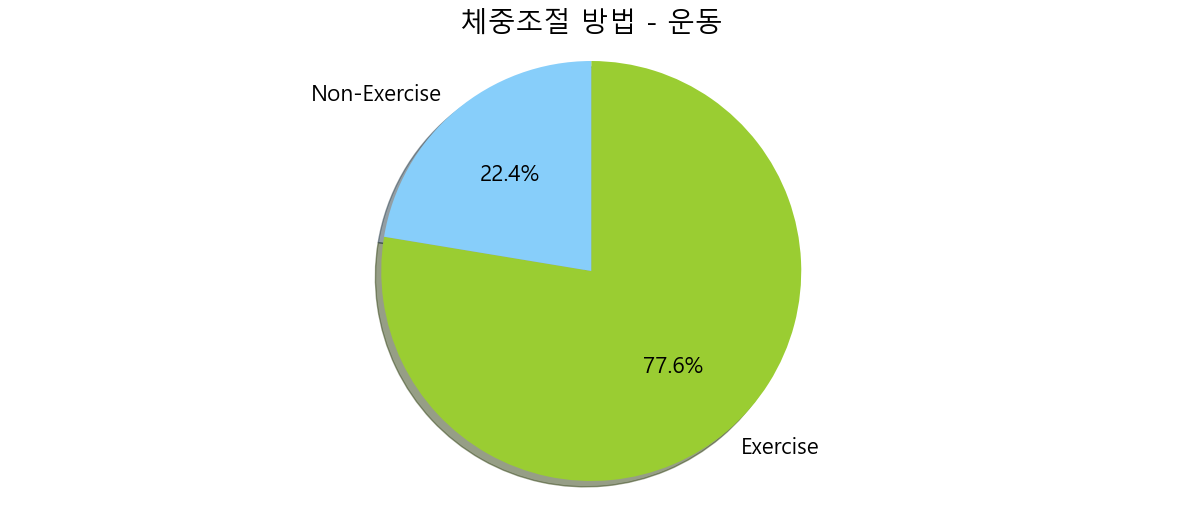

In [26]:
# 2)
labels = ['Exercise', 'Non-Exercise']
sizes = [(df1.exercise == 1).sum(), (df1.exercise == 0).sum()]
colors = ['yellowgreen', 'lightskyblue']

plt.figure(figsize = (15, 6))

plt.pie(sizes, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90, counterclock = False, textprops={'fontsize': 16})

plt.axis('equal')
plt.title('체중조절 방법 - 운동', fontsize = 20)
plt.show()

---

### 신체활동 실천 정도 - 비만 여부

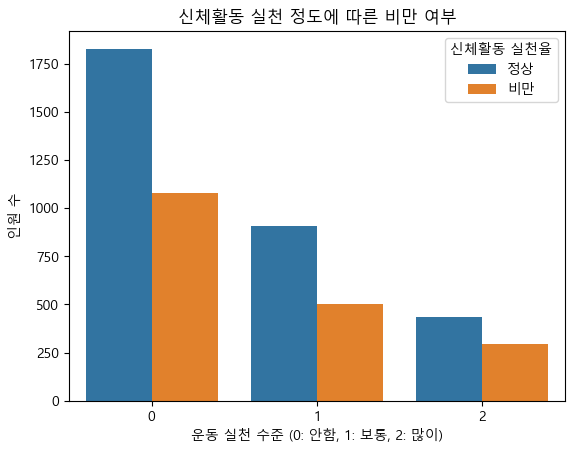

In [29]:
sns.countplot(data=df_selected, x='workout_rate', hue='isObesity', order = ['0','1','2'])
plt.title('신체활동 실천 정도에 따른 비만 여부')
plt.xlabel('운동 실천 수준 (0: 안함, 1: 보통, 2: 많이)')
plt.ylabel('인원 수')
plt.legend(title='신체활동 실천율')
plt.show()

In [30]:
#각 운동 실천율 그룹별 인원 수가 다르기 때문에 막대 높이의 절댓값만 보면 그룹 간 차이를 보기 어려움

In [31]:
cross_table2 = round(pd.crosstab(df_selected['workout_rate'], df_selected['isObesity'], normalize='index'),2)
cross_table2_ratio = cross_table2.div(cross_table2.sum(axis=1), axis=0)
cross_tab= cross_table2_ratio.reset_index().melt(id_vars='workout_rate', value_vars=cross_table2_ratio.columns, var_name='체중상태', value_name='비율')
cross_tab

,workout_rate,체중상태,비율
0,0,비만,0.37
1,1,비만,0.36
2,2,비만,0.41
3,0,정상,0.63
4,1,정상,0.64
5,2,정상,0.59


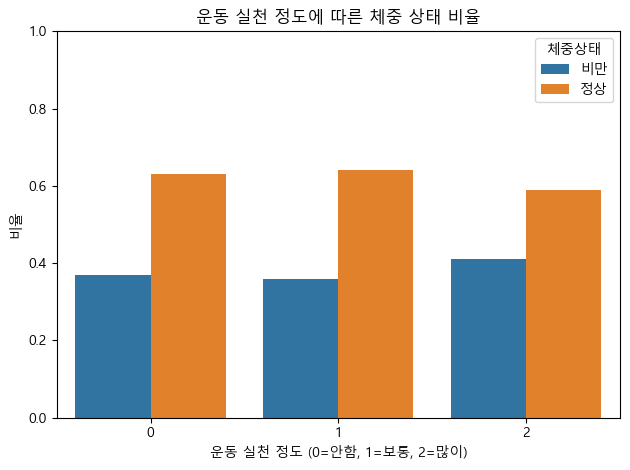

In [32]:
sns.barplot(data = cross_tab, x='workout_rate', y='비율', hue='체중상태')
plt.title('운동 실천 정도에 따른 체중 상태 비율')
plt.ylabel('비율')
plt.xlabel('운동 실천 정도 (0=안함, 1=보통, 2=많이)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [33]:
cross_table3 = round(pd.crosstab(df_selected['workout_rate'], df_selected['isObesity'], normalize='index'),2)
cross_table3

isObesity,비만,정상
workout_rate,,
0,0.37,0.63
1,0.36,0.64
2,0.41,0.59


In [34]:
#운동 실천 수준이 높다고 해서 비만율이 낮아지는 경향은 보이지 않음
#운동 실천 수준이 제일 높은 그룹(2)에서는 오히려 비만 비율이 늘어남
#비만이기 때문에 운동을 더 실천했을 가능성도 있음
#단순한 상관관계만으로 인과관계를 해석하기 어렵고, 교란 변수(예: 식습관, 건강 인식 등)도 고려해야 함

## 가설검정

In [36]:
#귀무가설: 운동 실천 정도와 비만 여부는 서로 관계가 없다

In [37]:
cross_table = pd.crosstab(df_selected['workout_rate'], df_selected['isObesity'])
cross_table

isObesity,비만,정상
workout_rate,,
0,1078,1828
1,501,909
2,297,434


In [38]:
chi2, p, dof, expected = stats.chi2_contingency(cross_table)

In [39]:
print(chi2)
print(p)
print(dof)
print(expected)

5.372561184388988
0.06813388638244323
2
[[1080.178 1825.822]
 [ 524.105  885.895]
 [ 271.717  459.283]]


In [40]:
#통계적으로 유의하지않다

---

## 운동 강도별 비만율

In [43]:
# sns.violinplot(df_selected, x = 'isObesity', y = 'vigorous')
# plt.show()

In [44]:
# sns.violinplot(df_selected, x = 'isObesity', y = 'moderate')
# plt.show()

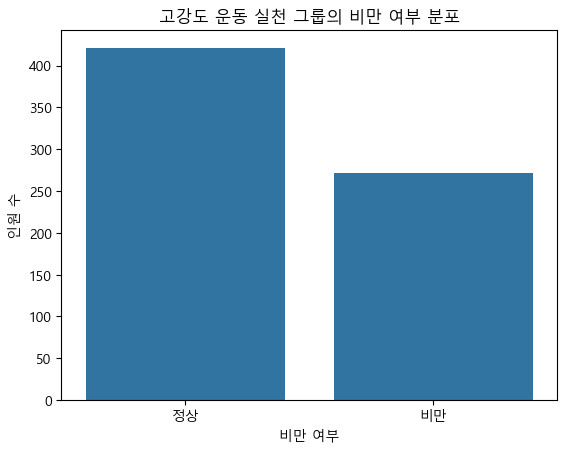

In [45]:
df_active = df_selected[df_selected['vigorous'] != 0]

sns.countplot(data=df_active, x='isObesity')
plt.title('고강도 운동 실천 그룹의 비만 여부 분포')
plt.xlabel('비만 여부')
plt.ylabel('인원 수')
plt.show()

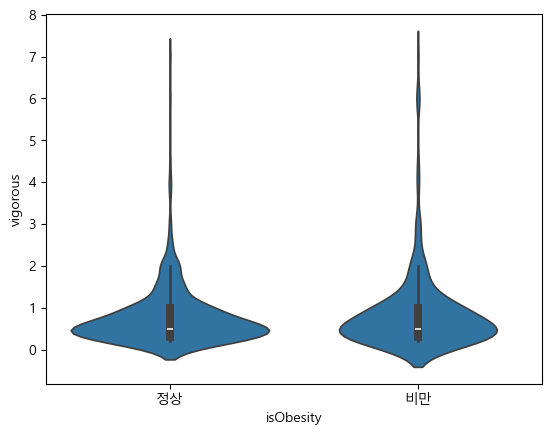

In [46]:
#운동 안하는 그룹 제외
sns.violinplot(df_active, x = 'isObesity', y = 'vigorous')
plt.show()

In [47]:
#운동시간이 정규분포를 따르지 않으므로 Mann-Whitney U 검정 (비모수검정)
#귀무가설: 비만 여부에 따라 고강도 운동시간의 차이가 없다.
#대립가설: 비만 여부에 따라 고강도 운동시간의 차이가 있다.
from scipy.stats import mannwhitneyu

vigorous_normal = df_active[df_active['isObesity'] == '정상']['vigorous']
vigorous_obese = df_active[df_active['isObesity'] == '비만']['vigorous']

u_stat, p_value = mannwhitneyu(vigorous_normal, vigorous_obese, alternative='two-sided')
print("U 통계량:", u_stat)
print("p-value:", p_value)

U 통계량: 56648.5
p-value: 0.8108711994109828


---

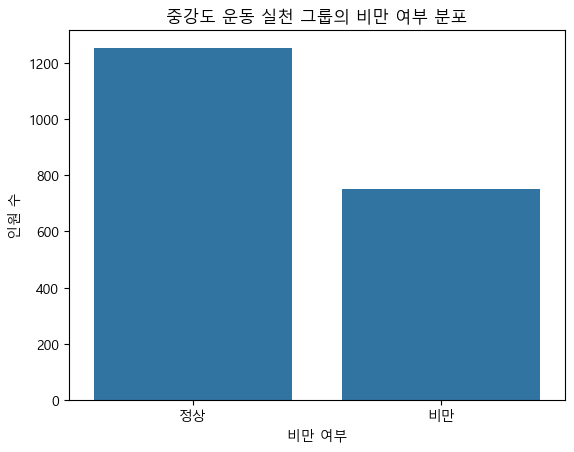

In [49]:
df_active2 = df_selected[df_selected['moderate'] != 0]

sns.countplot(data=df_active2, x='isObesity')
plt.title('중강도 운동 실천 그룹의 비만 여부 분포')
plt.xlabel('비만 여부')
plt.ylabel('인원 수')
plt.show()

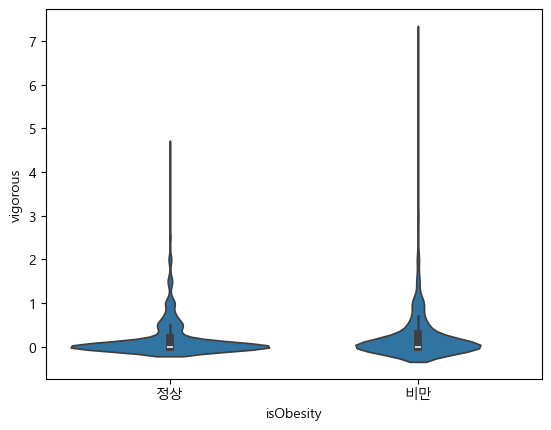

In [50]:
sns.violinplot(df_active2, x = 'isObesity', y = 'vigorous')
plt.show()

In [51]:
#운동시간이 정규분포를 따르지 않으므로 Mann-Whitney U 검정 (비모수검정)
#귀무가설: 비만 여부에 따라 중강도 운동시간의 차이가 없다.
#대립가설: 비만 여부에 따라 중강도 운동시간의 차이가 있다.
from scipy.stats import mannwhitneyu

moderate_normal = df_active2[df_active2['isObesity'] == '정상']['moderate']
moderate_obese = df_active2[df_active2['isObesity'] == '비만']['moderate']

u_stat, p_value = mannwhitneyu(moderate_normal, moderate_obese, alternative='two-sided')
print("U 통계량:", u_stat)
print("p-value:", p_value)

U 통계량: 442670.0
p-value: 0.024732319724433658


In [52]:
print("정상 그룹 중강도 운동 시간 (평균):", round(moderate_normal.mean(), 2))
print("비만 그룹 중강도 운동 시간 (평균):", round(moderate_obese.mean(), 2))

정상 그룹 중강도 운동 시간 (평균): 0.97
비만 그룹 중강도 운동 시간 (평균): 1.07


#### 시각적으로는 정상 표본과 비만 표본 간의 고강도 및 중강도 시간 분포의 차이를 보기 어려웠으나 비모수검정을 실시한 결과 두 집단 간의 중강도 운동 시간에 통계적으로 유의미한 차이가 있는 것으로 나타났다(비만 집단의 운동시간이 높은 것으로 나타남)
#### 고강도 운동 시간은 통계적으로 유의미한 차이가 없는 것으로 보임
#### 비만 집단은 중강도 운동은 정상 집단보다 많이 하는 경향이 있지만 고강도 운동에서는 그런 경향이 보이지않음

---

## 성별

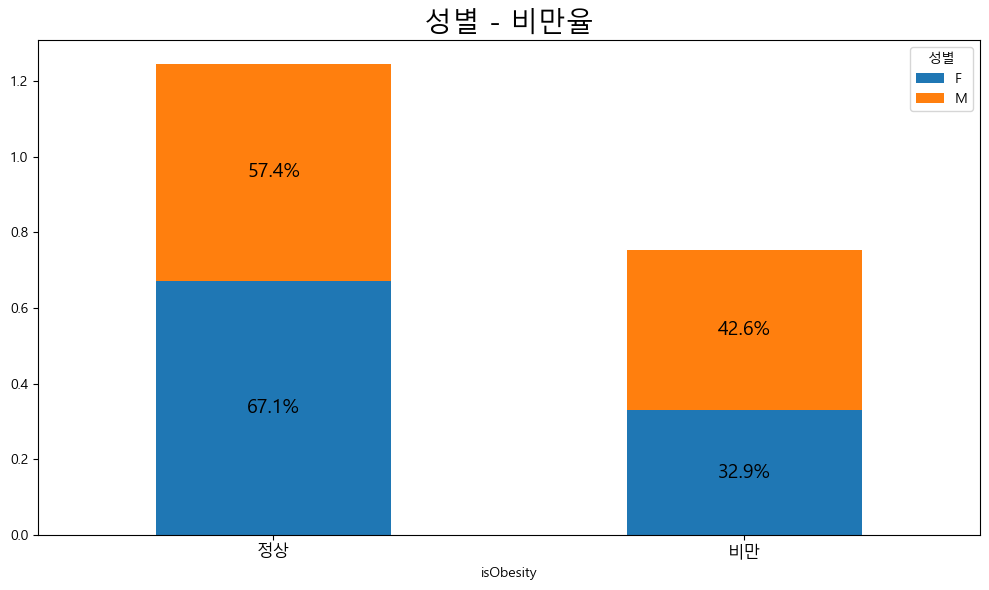

In [56]:
obe = pd.crosstab(df_selected.sex, df_selected.isObesity, normalize='index')
obe = obe.reindex(columns = ['정상', '비만'])

# 누적 막대그래프
ax = obe.T.plot(kind='bar', stacked=True, figsize=(10, 6))

# 퍼센트 표시
for i, col in enumerate(obe.columns):
    cumulative = 0
    for category in obe.index:
        height = obe.loc[category, col] 
        ax.text(i, cumulative + height / 2,
                f'{height*100:.1f}%',
                ha='center', va='center', fontsize=14, color='black')
        cumulative += height

plt.title('성별 - 비만율', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 12)
plt.legend(title='성별')
plt.tight_layout()
plt.show()

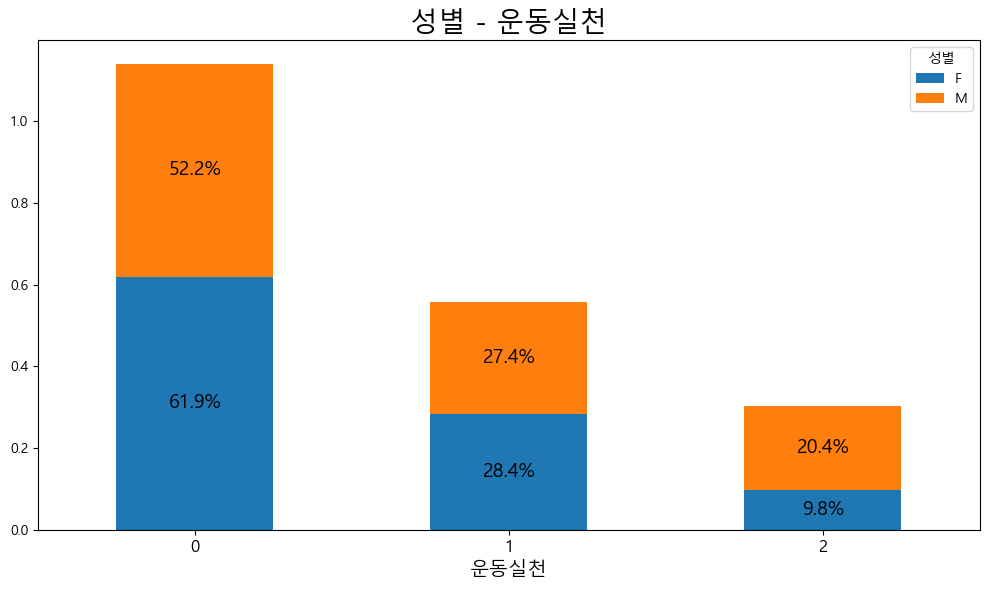

In [57]:
wor = pd.crosstab(df_selected.sex, df_selected.workout_rate, normalize='index')

# 누적 막대그래프
ax1 = wor.T.plot(kind='bar', stacked=True, figsize=(10, 6))

for i, col in enumerate(wor.columns):
    cumulative = 0
    for category in wor.index:
        height = wor.loc[category, col] 
        ax1.text(i, cumulative + height / 2,
                f'{height*100:.1f}%',
                ha='center', va='center', fontsize=14, color='black')
        cumulative += height

plt.title('성별 - 운동실천', fontsize = 20)
plt.xlabel('운동실천', fontsize = 14)
plt.xticks(rotation = 0, fontsize = 12)
plt.legend(title='성별')
plt.tight_layout()
plt.show()

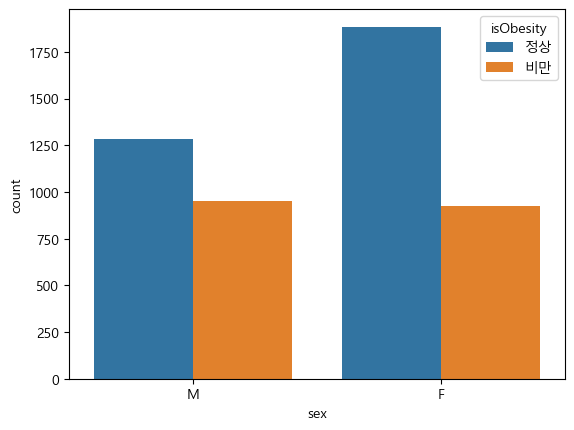

In [58]:
sns.countplot(df_selected, x = 'sex', hue = 'isObesity')
plt.show()

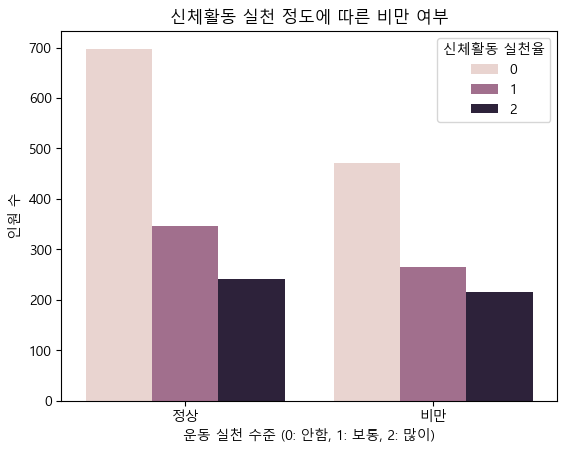

In [59]:
#남성
df_m = df_selected[df_selected['sex'] != "F"]
sns.countplot(data=df_m, x='isObesity', hue='workout_rate', order = ['정상', '비만'])
plt.title('신체활동 실천 정도에 따른 비만 여부')
plt.xlabel('운동 실천 수준 (0: 안함, 1: 보통, 2: 많이)')
plt.ylabel('인원 수')
plt.legend(title='신체활동 실천율')
plt.show()

In [60]:
#남성 표본 가설검정

In [61]:
cross_table_m = pd.crosstab(df_m['workout_rate'], df_selected['isObesity'])
cross_table_m

isObesity,비만,정상
workout_rate,,
0,471,698
1,266,347
2,216,241


In [62]:
chi2, p, dof, expected = stats.chi2_contingency(cross_table_m)

In [63]:
print(chi2)
print(p)
print(dof)
print(expected)

6.773980610272148
0.033810282555619804
2
[[497.569 671.431]
 [260.915 352.085]
 [194.516 262.484]]


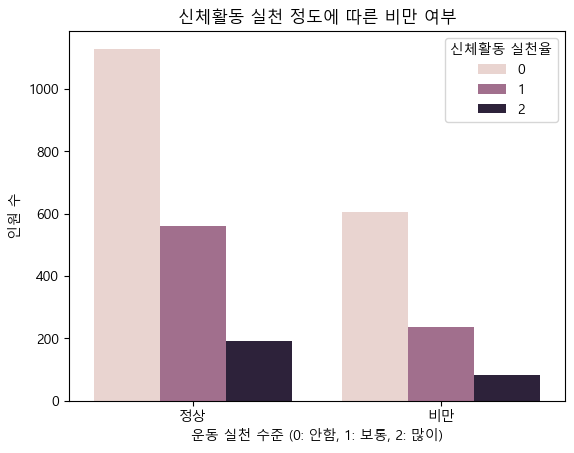

In [64]:
#여성
df_f = df_selected[df_selected['sex'] != "M"]
sns.countplot(data=df_f, x='isObesity', hue='workout_rate', order = ['정상', '비만'])
plt.title('신체활동 실천 정도에 따른 비만 여부')
plt.xlabel('운동 실천 수준 (0: 안함, 1: 보통, 2: 많이)')
plt.ylabel('인원 수')
plt.legend(title='신체활동 실천율')
plt.show()

In [65]:
#여성표본 가설검정

In [66]:
cross_table_f = pd.crosstab(df_f['workout_rate'], df_selected['isObesity'])
cross_table_f

isObesity,비만,정상
workout_rate,,
0,607,1130
1,235,562
2,81,193


In [67]:
chi2, p, dof, expected = stats.chi2_contingency(cross_table_f)

In [68]:
print(chi2)
print(p)
print(dof)
print(expected)

8.886384657093362
0.011758342050549682
2
[[ 570.958 1166.042]
 [ 261.977  535.023]
 [  90.065  183.935]]


#### 성별을 구분하지 않았을 때 운동 실천 정도와 비만 여부 사이의 관계는 통계적으로 유의하지 않았지만(p = 0.06), 성별로 나누어 분석한 결과 남성과 여성 모두에서 운동 실천 수준이 높을수록 비만율이 낮아지는 유의미한 경향이 있음.

---

## 결론

* 전체적으로 운동을 많이 할수록 비만율이 낮아지는 뚜렷한 경향은 보이지 않음.
운동을 가장 많이 실천한 그룹에서 비만 비율이 더 높게 나타났는데, 이는 비만 그룹이 체중을 조절하기 위해 운동을 더 실천했을 가능성이 있음.
단순한 상관관계만으로 운동이 비만에 영향을 준다고 해석하기는 어렵고, 식습관이나 건강 인식 같은 다른 요인의 영향도 함께 고려해야 할 것으로 생각됨.
하지만 성별로 나누어 분석해 보면, 남성과 여성 모두에서 운동 실천 수준이 높을수록 비만율이 낮아지는 유의미한 경향이 나타났고,
운동 강도별로는 고강도 운동 시간에서는 뚜렷한 차이가 없었지만, 중강도 운동 시간은 비만 집단에서 더 높았고, 이 차이는 통계적으로도 유의한 것으로 보아 성별이나 운동의 종류 같은 세부 요인을 고려한 분석이 중요하다고 생각됨.

In [144]:
df_selected.to_csv('df.csv', index = False, encoding = 'cp949')